In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

This dataset is composed of a survey questions of over 100 respondents for their buying behavior at Starbucks.
Income is show in Malaysian Ringgit (RM)

In [2]:
df = pd.read_csv(r"C:\Users\lbell\Downloads\Starbucks satisfactory survey.csv")

In [13]:
df.head(3)

,Id,gender,age,status,income,visitNo,method,timeSpend,location,membershipCard,...,spendPurchase,productRate,priceRate,promoRate,ambianceRate,wifiRate,serviceRate,chooseRate,promoMethod,loyal
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,<$6K,Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than $4.5,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,<$6K,Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than $4.5,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,<$6K,Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than $4.5,4,3,4,4,4,4,3,In Store displays;Billboards,Yes


In [12]:
#since the titles are a little cumbersome I will relabel them to make it easier to analyze
new_titles = ['Id', 'gender', 'age', 'status', 'income', 'visitNo', 'method',
       'timeSpend', 'location', 'membershipCard', 'purchaseFrequency',
       'spendPurchase', 'productRate', 'priceRate',
       'promoRate','ambianceRate', 'wifiRate', 'serviceRate','chooseRate','promoMethod','loyal']

#I created a dictionary for the new titles and replaced the old names
titles = dict(zip(df.columns.tolist(),new_titles))
titles
df.rename(columns = titles, inplace = True)
df.head(3)

,Id,gender,age,status,income,visitNo,method,timeSpend,location,membershipCard,...,spendPurchase,productRate,priceRate,promoRate,ambianceRate,wifiRate,serviceRate,chooseRate,promoMethod,loyal
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,<$6K,Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than $4.5,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,<$6K,Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than $4.5,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,<$6K,Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than $4.5,4,3,4,4,4,4,3,In Store displays;Billboards,Yes


In [11]:
#Since the income and spend values are in RM I replaced these fields with their USD equivalent
df = df.replace(['Less than RM25,000', 'RM25,000 - RM50,000','RM50,000 - RM100,000',
        'RM100,000 - RM150,000','More than RM150,000'],['<$6K','$6K-$12K','$12K-$23K','$23K-$35K','>$35K'])

df = df.replace(['Less than RM20', 'Around RM20 - RM40', 'More than RM40', 'Zero']\
                ,['Less than $4.5','Between $4.5-$9','More than $9','Zero'])

There are a few interesting columns including the ratings for many different aspects of the Starbucks experience such as price, ambiance, service, etc. Customers were also asked how likely they would be to choose Starbucks for business meetings or hanging out with friends (choose rate).

I'm interested to see what parameters impact customer's choose rate.

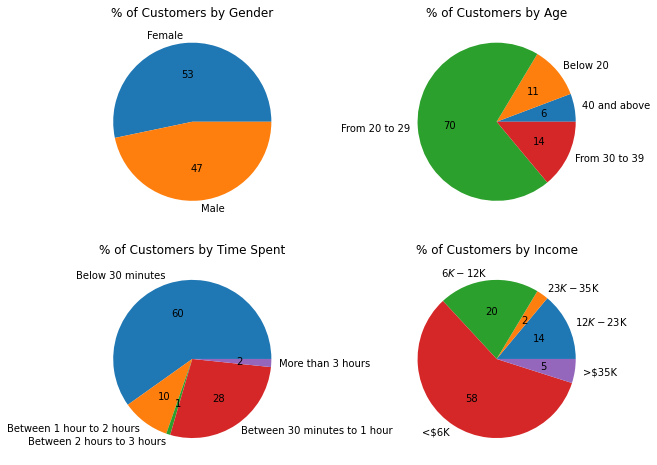

In [94]:
#Starting off by exploring the populations that answered the survey
gender = df.groupby('gender')['Id'].count()
age = df.groupby('age')['Id'].count()
timeSpend = df.groupby('timeSpend')['Id'].count()
income = df.groupby('income')['Id'].count()

fig,axes=plt.subplots(nrows=2,ncols=2 ,figsize=(10,8))
gender.plot.pie(autopct="%.0f",ax=axes[0,0])
axes[0,0].set(title = '% of Customers by Gender', ylabel = "")

age.plot.pie(autopct="%.0f",ax=axes[0,1])
axes[0,1].set(title = '% of Customers by Age', ylabel = "")

timeSpend.plot.pie(autopct="%.0f",ax=axes[1,0])
axes[1,0].set(title = '% of Customers by Time Spent', ylabel = "")

income.plot.pie(autopct="%.0f",ax=axes[1,1])
axes[1,1].set(title = '% of Customers by Income', ylabel = "")


plt.show()

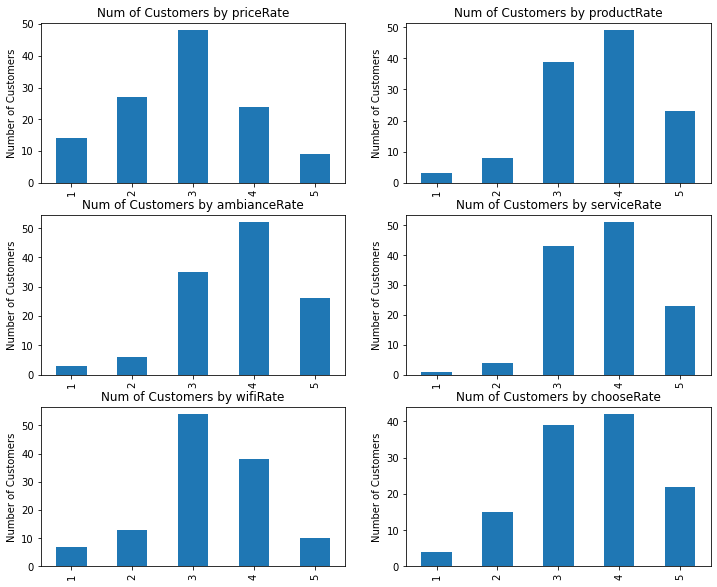

In [118]:
#Investigating the different ratings recieved 
priceRate = df.groupby('priceRate')['Id'].count()
productRate = df.groupby('productRate')['Id'].count()
ambianceRate = df.groupby('ambianceRate')['Id'].count()
serviceRate = df.groupby('serviceRate')['Id'].count()
wifiRate = df.groupby('wifiRate')['Id'].count()
chooseRate = df.groupby('chooseRate')['Id'].count()


fig,axes=plt.subplots(nrows=3,ncols=2 ,figsize=(12,10))
priceRate.plot(kind='bar',ax=axes[0,0])
axes[0,0].set(title = 'Num of Customers by priceRate', ylabel = "Number of Customers", xlabel="")

productRate.plot(kind='bar',ax=axes[0,1])
axes[0,1].set(title = 'Num of Customers by productRate', ylabel = "Number of Customers", xlabel="")

ambianceRate.plot(kind='bar',ax=axes[1,0])
axes[1,0].set(title = 'Num of Customers by ambianceRate', ylabel = "Number of Customers", xlabel="")

serviceRate.plot(kind='bar',ax=axes[1,1])
axes[1,1].set(title = 'Num of Customers by serviceRate', ylabel = "Number of Customers", xlabel="")

wifiRate.plot(kind='bar',ax=axes[2,0])
axes[2,0].set(title = 'Num of Customers by wifiRate', ylabel = "Number of Customers", xlabel="")

chooseRate.plot(kind='bar',ax=axes[2,1])
axes[2,1].set(title = 'Num of Customers by chooseRate', ylabel = "Number of Customers", xlabel="")


plt.show()

In [186]:
mean = df[['productRate', 'priceRate',
       'promoRate','ambianceRate', 'wifiRate', 'serviceRate','chooseRate']].mean().round(1)
median = df[['productRate', 'priceRate',
       'promoRate','ambianceRate', 'wifiRate', 'serviceRate','chooseRate']].median().round(1)
perc_75 = df[['productRate', 'priceRate',
       'promoRate','ambianceRate', 'wifiRate', 'serviceRate','chooseRate']].quantile(.75).round(1)
perc_25 = df[['productRate', 'priceRate',
       'promoRate','ambianceRate', 'wifiRate', 'serviceRate','chooseRate']].quantile(.25).round(1)

d = {'perc_25':perc_25.values.tolist(),'mean': mean.values.tolist(),\
     'median': median.values.tolist(),'perc_75':perc_75.values.tolist()}

stats = pd.DataFrame(data=d, index=['productRate', 'priceRate',\
                                    'promoRate','ambianceRate', 'wifiRate', 'serviceRate','chooseRate'])

[Text(0.5, 1.0, 'Stats per Rating')]

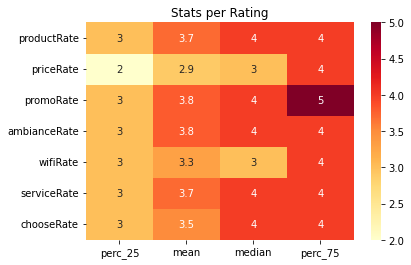

In [188]:
sns.heatmap(stats, cmap="YlOrRd", annot=True).set(title='Stats per Rating')

We can see that the price and wifi have the lowest average and median ratings for customers, while the highest rating goes to ambiance and promo rate.

Promo rate (how much do promotions and sales influence a customer's decision) seems to have high variance, with the customers in the 75th percentile rating this as a really impactful factor for their purchase. 

The average choose rate is 3.5, but it's interesting to see which of these factors has some correlation with it.

In [176]:
#checking the correlation of different ratings with the choose rate
corr = df.corr()['chooseRate'].sort_values(ascending=False)
corr

chooseRate      1.000000
serviceRate     0.425870
priceRate       0.420468
productRate     0.418969
ambianceRate    0.349267
wifiRate        0.259387
promoRate       0.197933
Name: chooseRate, dtype: float64

Though none of the ratings have a very strong correlation with the choose rate, we can see that service rate, price rate, and product rate have the strongest correlations and have pretty similar correlation coefficients. 

Conclusions:
-Service, price, and product are seemingly important factors in causing customers to choose Starbucks as a place to conduct business meetings and hangout with friends.
-Price is rated the lowest of all ratings in and since it's relatively important to a customer's choose rate, it could be wise to experiment with lower pricing options.
-The ambiance in Starbucks is one of it's best aspects (which is not a surprise).
-For certian customers, promotions and sales seem to be really important, though they don't seem to play a big part in causing them to choose Starbucks.